In [71]:
import torch

from vae import VAE

device = 'mps:0'

vae = VAE(latent=2)
vae.load_state_dict(torch.load('vae.pth'))
vae.eval()

VAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Flatten()
      (1): Linear(in_features=784, out_features=512, bias=True)
      (2): ReLU()
      (3): Linear(in_features=512, out_features=256, bias=True)
      (4): ReLU()
    )
    (calc_mean): Linear(in_features=256, out_features=2, bias=True)
    (calc_logvar): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (decode): Sequential(
      (0): Linear(in_features=2, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=512, bias=True)
      (3): ReLU()
      (4): Linear(in_features=512, out_features=784, bias=True)
      (5): Sigmoid()
      (6): Reshape()
    )
  )
)

In [75]:
import numpy as np
import torchvision

tf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=tf,
)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=False, num_workers=0)
for images, labels in dataloader:
    break
    
images[:,:,9:10,:] = 0.0
images[:,:,:,9:10] = 0.0

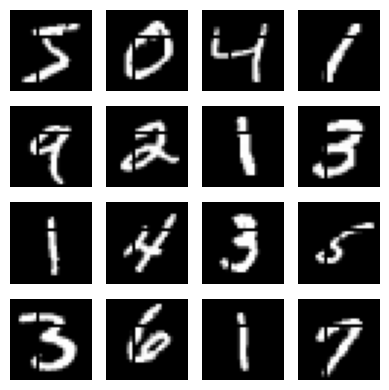

In [76]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(0).numpy(), cmap='gray')
    # ax.set_title(f'{texts[i]}')
    ax.axis("off")
plt.tight_layout()
plt.show()

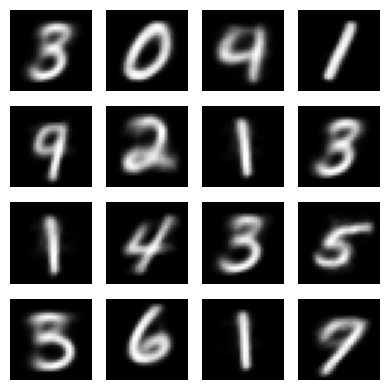

In [77]:
with torch.no_grad():
    images_hat, mean, logvar = vae(images)

fig, axes = plt.subplots(4, 4, figsize=(4, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images_hat[i].squeeze(0).numpy(), cmap='gray')
    # ax.set_title(f'{texts[i]}')
    ax.axis("off")
plt.tight_layout()
plt.show()

# VQ VAE

In [78]:
from vqvae import VAE
from matplotlib import pyplot as plt

net = VAE(latent=2, num_embeddings=32)

In [82]:
data = net.vq.embedding.weight.data

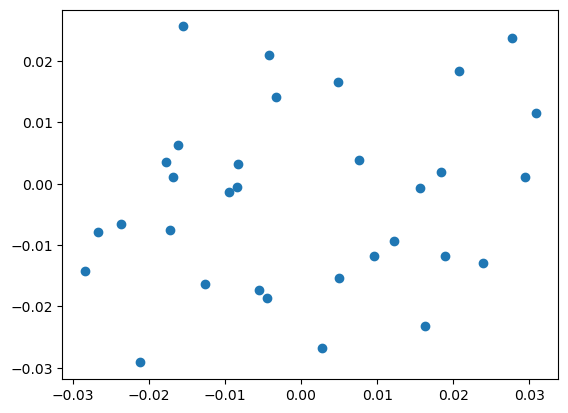

In [84]:
plt.scatter(data[:,0], data[:,1])

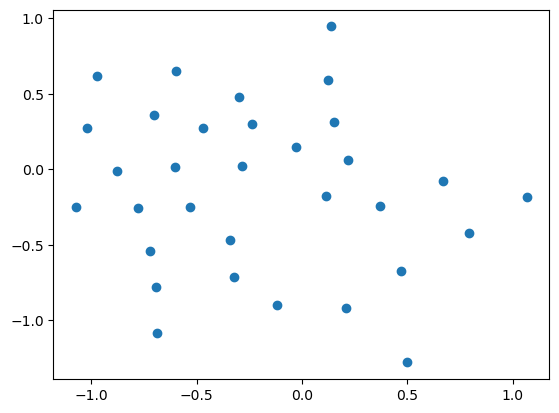

In [86]:
net.load_state_dict(torch.load('vqvae.pth'))
data = net.vq.embedding.weight.data
plt.scatter(data[:,0], data[:,1])

In [5]:
import torch
import torch.nn as nn

class ResConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, bias=False))

    def forward(self, input):
        return input + self.conv(input)

input_image = torch.randn(10, 1, 28, 28)


conv1 = nn.Conv2d(1, 2, kernel_size=4, stride=2, padding=1)
conv2 = nn.Conv2d(2, 4, kernel_size=4, stride=2, padding=1)
conv3 = nn.Conv2d(4, 8, kernel_size=4, stride=2, padding=1)
conv4 = nn.ConvTranspose2d(8, 4, kernel_size=5, stride=2, padding=1)
conv5 = nn.ConvTranspose2d(4, 2, kernel_size=4, stride=2, padding=1)
conv6 = nn.ConvTranspose2d(2, 1, kernel_size=4, stride=2, padding=1)

conv7 = ResConv(1, 4)

conv3b = nn.Conv2d(8, 16, kernel_size=3, stride=3, padding=1)
conv3c = nn.ConvTranspose2d(16, 8, kernel_size=3, stride=3, padding=0)
xx = conv3b(x3)
yy = conv3c(xx)
print(xx.shape, yy.shape)

x = conv1(input_image)
x2 = conv2(x)
x3 = conv3(x2)
x4 = conv4(x3)
x5 = conv5(x4)
x6 = conv6(x5)
x7 = conv7(x6)

# Print the shapes of input and output
print("Input shape:", input_image.shape)
print("Output shape:", x.shape, x2.shape, x3.shape, x4.shape, x5.shape, x6.shape, x7.shape)

torch.Size([10, 16, 1, 1]) torch.Size([10, 8, 3, 3])
Input shape: torch.Size([10, 1, 28, 28])
Output shape: torch.Size([10, 2, 14, 14]) torch.Size([10, 4, 7, 7]) torch.Size([10, 8, 3, 3]) torch.Size([10, 4, 7, 7]) torch.Size([10, 2, 14, 14]) torch.Size([10, 1, 28, 28]) torch.Size([10, 4, 28, 28])
